In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Read in the gourds data into a DataFrame named `gourds` and look at the top 5 rows.


In [3]:
gourds = pd.read_csv("../data/gourds.csv")

In [4]:
gourds.head()

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,place_bk,year_bk,type_bk
0,2013-F,1,154.5,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,NaN,1.0,2013,F
1,2013-F,2,146.5,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,NaN,194.0,151.0,NaN,2.0,2013,F
2,2013-F,3,145.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.0,NaN,3.0,2013,F
3,2013-F,4,140.8,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,NaN,4.0,2013,F
4,2013-F,5,139.0,"Barlow, John",NaN,Wisconsin,United States,Stillwater Harvestfest,130.5 McKinnon,open,0.0,0.0,NaN,5.0,2013,F


In [5]:
gourds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28011 entries, 0 to 28010
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 28011 non-null  object 
 1   place              28011 non-null  object 
 2   weight_lbs         28011 non-null  float64
 3   grower_name        28011 non-null  object 
 4   city               25232 non-null  object 
 5   state_prov         28011 non-null  object 
 6   country            28011 non-null  object 
 7   gpc_site           28011 non-null  object 
 8   seed_mother        19468 non-null  object 
 9   pollinator_father  17704 non-null  object 
 10  ott                24854 non-null  float64
 11  est_weight         24854 non-null  float64
 12  variety            715 non-null    object 
 13  place_bk           25684 non-null  float64
 14  year_bk            28011 non-null  int64  
 15  type_bk            28011 non-null  object 
dtypes: float64(4), int64(1

### 3. Create a visualization (your choice) which shows the distribution of weights across the dataset. What do you notice from this visualization?


Text(0, 0.5, 'Frequency')

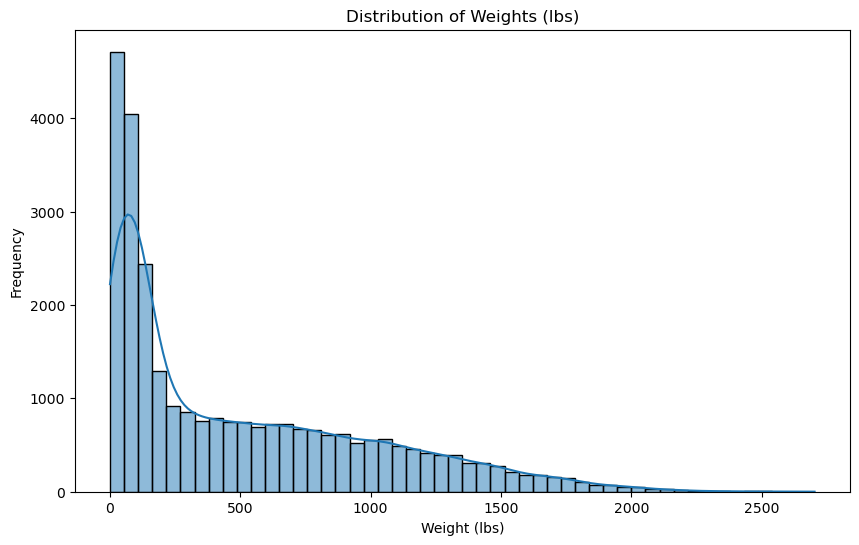

In [7]:
plt.figure(figsize=(10, 6))

sns.histplot(data=gourds, x='weight_lbs', bins=50, kde=True)
plt.title("Distribution of Weights (lbs)")
plt.xlabel("Weight (lbs)")
plt.ylabel("Frequency")

<div class="alert alert-block alert-success">
<b>Most gourds weigh less than 200 lbs, while a small number reach weights exceeding 2,000 lbs.
</div>


### 4. The place column contains the finishing position of a gourd within its category for a given year. Convert this column to a numeric type. (Note: this column contains two non-numeric values - 'EXH' and 'DMG'. You can replace these values with NaN.). If you cannot find a solution for this question, you can use the `place_bk` column in order to answer the questions that follow that rely on it.

In [10]:
gourds["place"] = pd.to_numeric(gourds["place"], errors='coerce')
gourds.dtypes['place']

dtype('float64')

### 5. Which country shows up the most frequently in the dataset? Create a visualization (your choice) to show the frequency of appearances for the top 5 countries in terms of number of appearances.

In [12]:
top_5_country_gourds = gourds['country'].value_counts().reset_index().head(5).copy()
print(top_5_country_gourds)

         country  count
0  United States  17070
1         Canada   4522
2        Germany   2175
3          Italy    846
4        Austria    602


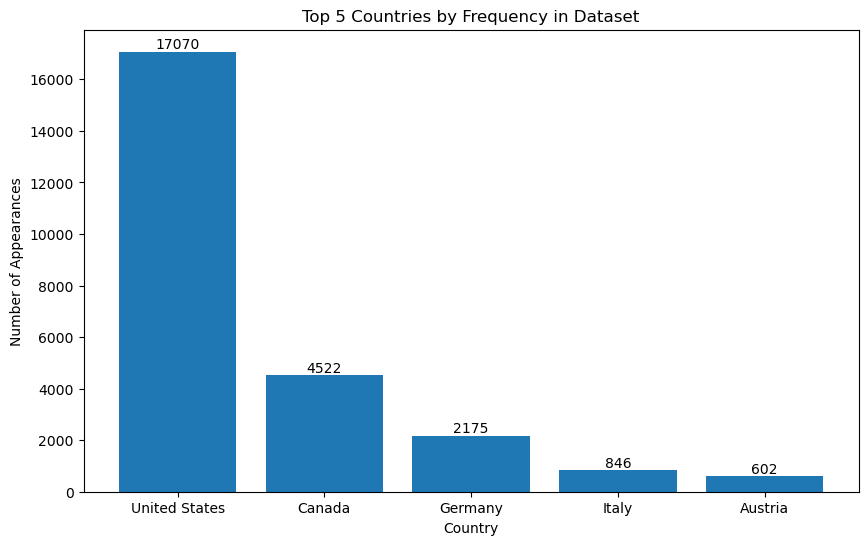

In [13]:
y_pos = np.arange(len(top_5_country_gourds['country']))

plt.figure(figsize=(10, 6))

plt.bar(y_pos, top_5_country_gourds['count'])

for i, value in enumerate(top_5_country_gourds['count']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Top 5 Countries by Frequency in Dataset')
plt.ylabel('Number of Appearances')
plt.xlabel('Country')

plt.xticks(y_pos, top_5_country_gourds['country'])

plt.show()

### 6. The `id` column contains contains a concatenation of the year and an abbreviation for the type of gourd. For example "2013-F" means that this record is from the year 2013, and the gourd is of type "F" (which stands for Field Pumpkin). Create two new columns, `year` and `type` by extracting these values from the `id` column. If you cannot find a solution for this question, you can use the `year_bk` and `type_bk` columns to answer the questions below that rely on it.

In [15]:
gourds['year'] = gourds['id'].str.extract(r'(\d{4})')
gourds['type'] = gourds['id'].str.extract(r'-(\w)$')

In [16]:
gourds.head()

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,place_bk,year_bk,type_bk,year,type
0,2013-F,1.0,154.5,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,NaN,1.0,2013,F,2013,F
1,2013-F,2.0,146.5,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,NaN,194.0,151.0,NaN,2.0,2013,F,2013,F
2,2013-F,3.0,145.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.0,NaN,3.0,2013,F,2013,F
3,2013-F,4.0,140.8,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,NaN,4.0,2013,F,2013,F
4,2013-F,5.0,139.0,"Barlow, John",NaN,Wisconsin,United States,Stillwater Harvestfest,130.5 McKinnon,open,0.0,0.0,NaN,5.0,2013,F,2013,F


### 7. Create a line plot showing the trend in the **heaviest** gourd by year. What do you notice?


In [18]:
heaviest_per_year = gourds.groupby('year')['weight_lbs'].max().reset_index()
print(heaviest_per_year)

   year  weight_lbs
0  2013      2032.0
1  2014      2323.7
2  2015      2230.5
3  2016      2624.6
4  2017      2363.0
5  2018      2528.0
6  2019      2517.0
7  2020      2593.7
8  2021      2702.9


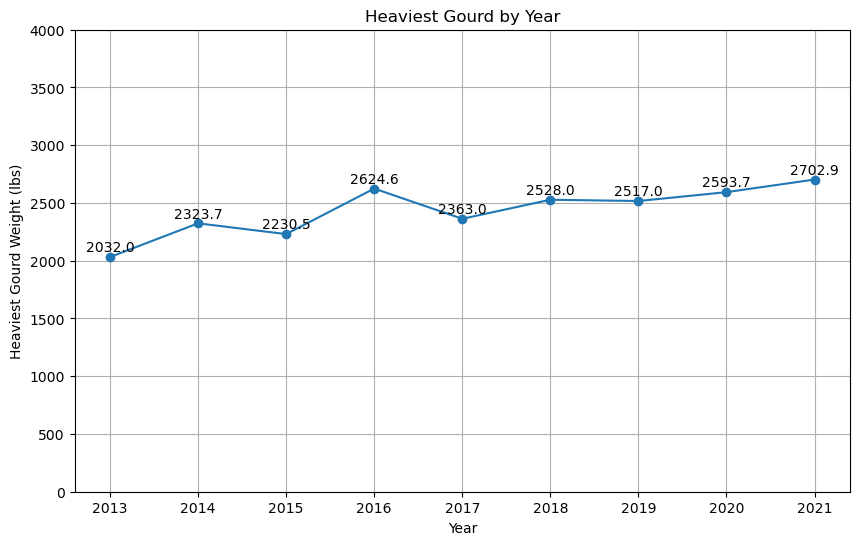

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(heaviest_per_year['year'], heaviest_per_year['weight_lbs'], marker='o')

for i, value in enumerate(heaviest_per_year['weight_lbs']):
    plt.text(i, value + 20, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Heaviest Gourd by Year")
plt.xlabel("Year")
plt.ylabel("Heaviest Gourd Weight (lbs)")

plt.ylim(0,4000)

plt.grid(True)

plt.show()

<div class="alert alert-block alert-success">
<b>There is a  overall increase in the maximum gourd weights over the years.
</div>

### 8. Replace the type abbreviations with the full names of each type. 
    ```
    "F": "Field Pumpkin"
    "P": "Giant Pumpkin"
    "S": "Giant Squash"
    "W": "Giant Watermelon"
    "T": "Tomato"
    "L": "Long Gourd"
    ```
    Which type of gourd is heaviest on average? Create a visualization showing the distribution of gourd weights by type.

In [22]:
abb_dict = {
    "F": "Field Pumpkin",
    "P": "Giant Pumpkin",
    "S": "Giant Squash",
    "W": "Giant Watermelon",
    "T": "Tomato",
    "L": "Long Gourd"}

gourds['type_full'] = gourds['type'].map(abb_dict)
gourds.head()

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,place_bk,year_bk,type_bk,year,type,type_full
0,2013-F,1.0,154.5,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,NaN,1.0,2013,F,2013,F,Field Pumpkin
1,2013-F,2.0,146.5,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,NaN,194.0,151.0,NaN,2.0,2013,F,2013,F,Field Pumpkin
2,2013-F,3.0,145.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.0,NaN,3.0,2013,F,2013,F,Field Pumpkin
3,2013-F,4.0,140.8,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,NaN,4.0,2013,F,2013,F,Field Pumpkin
4,2013-F,5.0,139.0,"Barlow, John",NaN,Wisconsin,United States,Stillwater Harvestfest,130.5 McKinnon,open,0.0,0.0,NaN,5.0,2013,F,2013,F,Field Pumpkin


In [23]:
avg_per_type = gourds.groupby('type_full')['weight_lbs'].mean().reset_index().sort_values(by='weight_lbs', ascending=False)
print(avg_per_type)

          type_full  weight_lbs
1     Giant Pumpkin  776.033885
2      Giant Squash  527.298348
3  Giant Watermelon  127.149110
4        Long Gourd   94.567945
0     Field Pumpkin   79.456309
5            Tomato    3.176921


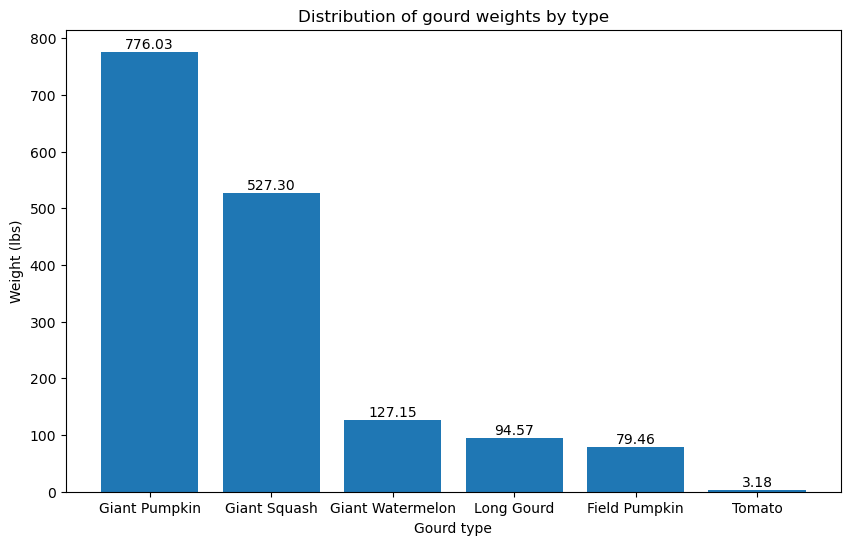

In [24]:
y_pos = np.arange(len(avg_per_type['type_full']))

plt.figure(figsize=(10, 6))

plt.bar(y_pos, avg_per_type['weight_lbs'])

for i, value in enumerate(avg_per_type['weight_lbs']):
    plt.text(i, value + 0.5,  f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.title('Distribution of gourd weights by type')
plt.ylabel('Weight (lbs)')
plt.xlabel('Gourd type')

plt.xticks(y_pos, avg_per_type['type_full'])

plt.show()

### 9. Create a visualization to compare the estimated weight (`est_weight`) to the actual weight (`weight_lbs`). What do you notice?

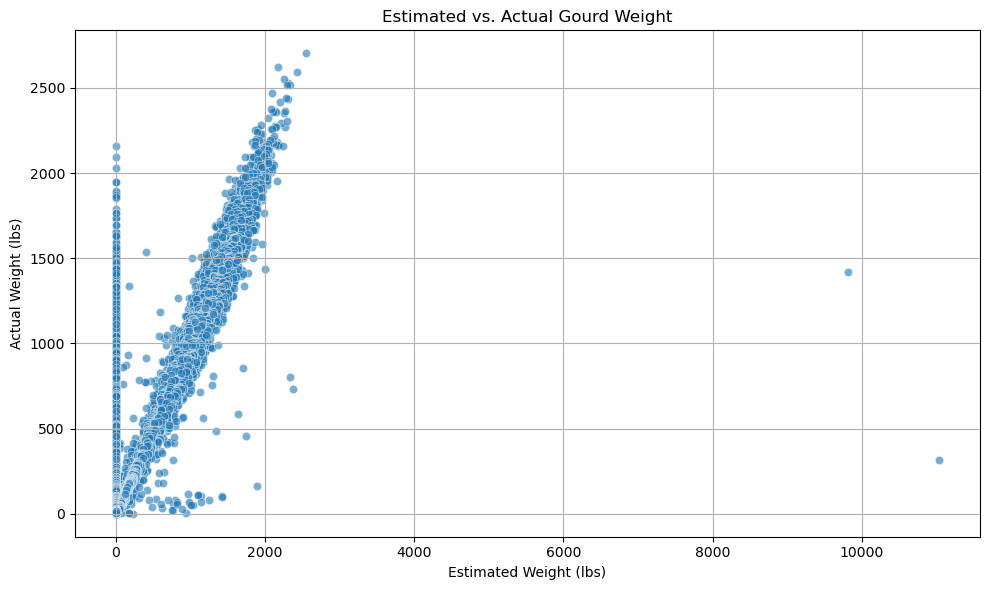

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gourds, x='est_weight', y='weight_lbs', alpha=0.6)

plt.title("Estimated vs. Actual Gourd Weight")
plt.xlabel("Estimated Weight (lbs)")
plt.ylabel("Actual Weight (lbs)")
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>There is a linear trend, that higher estimated weights generally correspond to higher actual weights, which indicates the estimation process is effective.
</div>

### 10. Create a new column `weight_error` that contains the amount by which the estimated weight exceeded the actual weight. What is the worst overestimate of a gourd weight? What percentage of gourd weights are overestimated?


In [29]:
gourds['weight_error'] = gourds['est_weight'] - gourds['weight_lbs']
gourds.head()

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,place_bk,year_bk,type_bk,year,type,type_full,weight_error
0,2013-F,1.0,154.5,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,NaN,1.0,2013,F,2013,F,Field Pumpkin,-25.5
1,2013-F,2.0,146.5,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,NaN,194.0,151.0,NaN,2.0,2013,F,2013,F,Field Pumpkin,4.5
2,2013-F,3.0,145.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.0,NaN,3.0,2013,F,2013,F,Field Pumpkin,-30.0
3,2013-F,4.0,140.8,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,NaN,4.0,2013,F,2013,F,Field Pumpkin,10.2
4,2013-F,5.0,139.0,"Barlow, John",NaN,Wisconsin,United States,Stillwater Harvestfest,130.5 McKinnon,open,0.0,0.0,NaN,5.0,2013,F,2013,F,Field Pumpkin,-139.0


In [30]:
biggest_weight_overestimate = gourds.sort_values(by='weight_error', ascending=False).head(1)
print(f"The worst overestimate of a gourd weight was {biggest_weight_overestimate['weight_error'].iloc[0]} lbs in {biggest_weight_overestimate['year'].iloc[0]}")

The worst overestimate of a gourd weight was 10717.0 lbs in 2019


### 11. Some growers compete across multiple types of gourd. Which grower has **top 10** finishes across the largest number of types of gourds? What is this grower's best finish in the GPC Weighoff in the years that are covered in this dataset?


In [32]:
top_10_every_year = gourds[['year', 'place', 'weight_lbs', 'type_full', 'grower_name']].copy()
top_10_every_year = top_10_every_year[top_10_every_year['place'] <= 10]
top_10_every_year.head()

,year,place,weight_lbs,type_full,grower_name
0,2013,1.0,154.5,Field Pumpkin,"Ellenbecker, Todd & Sequoia"
1,2013,2.0,146.5,Field Pumpkin,"Razo, Steve"
2,2013,3.0,145.0,Field Pumpkin,"Ellenbecker, Todd & Sequoia"
3,2013,4.0,140.8,Field Pumpkin,"Martin, Margaret & Glen"
4,2013,5.0,139.0,Field Pumpkin,"Barlow, John"


In [33]:
grower_type_df = top_10_every_year.groupby('grower_name')['type_full'].nunique().sort_values(ascending=False).reset_index().copy()
grower_type_df.head()

,grower_name,type_full
0,"Martin, Margaret & Glen",4
1,"Barlow, John",3
2,"Ansems, Fred",3
3,"Werner, Quinn",3
4,"Tobeck, Cindy",3


In [34]:
top_grower_name = grower_type_df['grower_name'].head(1).iloc[0]
# print(top_grower_name)

top_grower_data = gourds[gourds['grower_name'] == top_grower_name]
top_grower_data.head()

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,place_bk,year_bk,type_bk,year,type,type_full,weight_error
3,2013-F,4.0,140.80,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,NaN,4.0,2013,F,2013,F,Field Pumpkin,10.20
19,2013-F,16.0,128.00,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Mishicot Pumpkin Fest,109 Martin,open,194.0,151.0,NaN,16.0,2013,F,2013,F,Field Pumpkin,23.00
310,2013-L,18.0,121.25,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,137.75 Wright,116 Eaton,0.0,0.0,NaN,18.0,2013,L,2013,L,Long Gourd,-121.25
329,2013-L,37.0,115.13,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Mishicot Pumpkin Fest,116.62 Martin,116 Eaton,0.0,0.0,NaN,37.0,2013,L,2013,L,Long Gourd,-115.13
372,2013-L,76.0,103.00,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Mishicot Pumpkin Fest,111.75 Martin '2012,self,0.0,0.0,NaN,76.0,2013,L,2013,L,Long Gourd,-103.00


In [35]:
best_top_grower_result = top_grower_data.sort_values(by='weight_lbs', ascending=False).head(1)
best_top_grower_result.head()

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,place_bk,year_bk,type_bk,year,type,type_full,weight_error
3437,2014-P,34.0,1750.5,"Martin, Margaret & Glen",Kaukauna,Wisconsin,United States,Stillwater Harvestfest,1338 Martin,1476.5 Martin,428.0,1593.0,NaN,34.0,2014,P,2014,P,Giant Pumpkin,-157.5


In [36]:
print(f"{top_grower_name} had top-10 finishes across {grower_type_df['type_full'].head(1).iloc[0]} different gourd types.")
print(f"Their best finish was a {best_top_grower_result['weight_lbs'].iloc[0]} lbs gourd in {best_top_grower_result['year'].iloc[0]} ({best_top_grower_result['type_full'].iloc[0]}).")

Martin, Margaret & Glen had top-10 finishes across 4 different gourd types.
Their best finish was a 1750.5 lbs gourd in 2014 (Giant Pumpkin).


### 12. How many gourds have at least 100 offspring that have appeared in the GPC Weighoff? You can count a pumpkin as having an offspring if it is either the seed_mother or pollinator_father. Hint: One way you could do this is to create two `value_counts` Series on the `seed_mother` and `pollinator_father` columns and merge them.

In [38]:
def custom_round_str(weight):
    if abs(weight % 1) == 0.5:
        return f"{weight:.1f}"
    else:
        return str(int(weight))

gourds['weight_rounded'] = gourds['weight_lbs'].apply(custom_round_str)

gourds['last_name'] = gourds['grower_name'].str.split(',').str[0]

gourds['pumpkin_name'] = gourds['weight_rounded'] + " " + gourds['last_name']
gourds.head()

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,...,place_bk,year_bk,type_bk,year,type,type_full,weight_error,weight_rounded,last_name,pumpkin_name
0,2013-F,1.0,154.5,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,...,1.0,2013,F,2013,F,Field Pumpkin,-25.5,154.5,Ellenbecker,154.5 Ellenbecker
1,2013-F,2.0,146.5,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,NaN,...,2.0,2013,F,2013,F,Field Pumpkin,4.5,146.5,Razo,146.5 Razo
2,2013-F,3.0,145.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,...,3.0,2013,F,2013,F,Field Pumpkin,-30.0,145,Ellenbecker,145 Ellenbecker
3,2013-F,4.0,140.8,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,...,4.0,2013,F,2013,F,Field Pumpkin,10.2,140,Martin,140 Martin
4,2013-F,5.0,139.0,"Barlow, John",NaN,Wisconsin,United States,Stillwater Harvestfest,130.5 McKinnon,open,...,5.0,2013,F,2013,F,Field Pumpkin,-139.0,139,Barlow,139 Barlow


In [65]:
seed_mother_counts = gourds['seed_mother'].value_counts()

gourds['seed_mother_count'] = gourds['pumpkin_name'].map(seed_mother_counts).fillna(0).astype(int)

seed_father_counts = gourds['pollinator_father'].value_counts()

gourds['seed_father_counts'] = gourds['pumpkin_name'].map(seed_mother_counts).fillna(0).astype(int)

gourds['seed_parent_count'] = gourds['seed_mother_count'] + gourds['seed_father_counts']

gourds.sort_values(by='seed_parent_count', ascending=False).head(5)

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,...,year,type,type_full,weight_error,weight_rounded,last_name,pumpkin_name,seed_mother_count,seed_father_counts,seed_parent_count
495,2013-P,2.0,1985.0,"Miller, Gary",Napa,California,United States,Safeway World Championship Pumpkin Weigh-Off,2009 Wallace,1725 Harp,...,2013,P,Giant Pumpkin,-176.0,1985,Miller,1985 Miller,89,89,178
13140,2017-P,27.0,1911.0,"Urena, Leonardo",Napa,California,United States,Uesugi Farms Weigh-off,2066.0 Geddes,1631 Urena,...,2017,P,Giant Pumpkin,-103.0,1911,Urena,1911 Urena,72,72,144
13114,2017-P,1.0,2363.0,"Holland, Joel",Sumner,Washington,United States,Safeway World Championship Pumpkin Weigh-Off,2145.5 McMullen,2261.5 Wallace,...,2017,P,Giant Pumpkin,-231.0,2363,Holland,2363 Holland,61,61,122
3408,2014-P,6.0,2008.0,"Neptune, Bill",New Concord,Ohio,United States,Operation Pumpkin,1730 Werner,2009 Wallace,...,2014,P,Giant Pumpkin,-118.0,2008,Neptune,2008 Neptune,60,60,120
2616,2013-W,2.0,316.0,"Edwards, Bill",Marshall,Michigan,United States,Harnica Farms Great Pumpkin Weigh-off,239 Leonard,199.5 Mudd,...,2013,W,Giant Watermelon,-8.0,316,Edwards,316 Edwards,47,47,94


In [67]:
count_100_kids = (gourds['seed_parent_count'] > 100).sum()
print(f"There are {count_100_kids} gourds where the combined number of times they appear as a seed mother or seed father exceeds 100.")

There are 4 gourds where the combined number of times they appear as a seed mother or seed father exceeds 100.
